In [7]:
import os, json
feeds = []
logfile = 'testlog.json'
# Write the dictionary object to your log file as JSON
if not os.path.isfile(logfile):
    with open(logfile, 'w') as f:
        json.dump(logdata, f)
else:
    with open(logfile) as feedsjson:
        feeds = json.load(feedsjson)
    for k,v in logdata.items():
        feeds[k] = v
    # with open(logfile, mode='w') as f:
    #     f.write(json.dumps(feeds, indent=2))

In [1]:
CURR_EMO = 'hp'
config = {
    CURR_EMO: CURR_EMO,
}

In [2]:
print(config)

{'hp': 'hp'}


In [7]:
        
# Write the dictionary object to your log file as JSON
if not os.path.isfile(logfile):
    json.dump(logdata, logfile)
else:
    with open(logfile) as feedsjson:
        feeds = json.load(feedsjson)

    feeds.append(logdata)
    with open(logfile, mode='w') as f:
        f.write(json.dumps(feeds, indent=2))

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [8]:
feeds

[]

In [9]:
import os
import json

log_file = [] 
with open('nohup.out') as f:
    log_file.append(f.readlines())

In [10]:
log_file = log_file[0]

In [11]:
result = []
for i in log_file:
    if 'LOSS train' in i or 'ACC train' in i or 'Result of EPOCH' in i:
        result.append(i.strip())

In [12]:
len(result)


513

In [13]:
result_dic = {}
for i in range(0, len(result), 3):
    epoch = result[i].split(' ')[-1]
    temp = {}
    
    # LOSS
    loss = result[i+1].split(' ')
    temp['loss'] = {'train': loss[2], 'valid': loss[4]}
    # ACC
    acc = result[i+1].split(' ')
    temp['acc'] = {'train': acc[2], 'valid': acc[4]}

    result_dic[epoch] = temp
    # result_dic[]
    # print([result[i], result[i+1], result[i+2]])

In [14]:
for k,v in logdata.items():
    feeds[k] = v

NameError: name 'logdata' is not defined

In [97]:
# logfile = '20230303_195213log.json'
# logdata = result_dic
# feeds = []
# if not os.path.isfile(logfile):
#     with open(logfile, 'w') as f:
#         json.dump(logdata, f)
# else:
#     with open(logfile) as feedsjson:
#         feeds = json.load(feedsjson)
#     for k,v in logdata.items():
#         feeds[k] = v
#     with open(logfile, mode='w') as f:
#         f.write(json.dumps(feeds, indent=2))

[0.3855, 0.1944, 0.1252, 0.1066, 0.1037, 0.1031, 0.0771, 0.0886, 0.0878, 0.0756, 0.0653, 0.0685, 0.0651, 0.0696, 0.0707, 0.0705, 0.0613, 0.0525, 0.0415, 0.0479, 0.0502, 0.0302, 0.0543, 0.0357, 0.0803, 0.0813, 0.0455, 0.0822, 0.0563, 0.065]


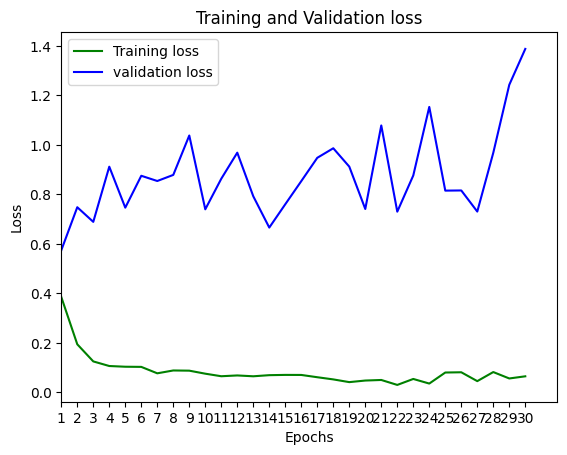

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import json
result_dic = []
result_dic = json.load(open('20230303_195213log.json'))
# result_dic = json.load(open('20230413_063159log.json'))
# print(result_dic)

# draw fig
loss_train = []
loss_val = []
epochs = []
for k,v in result_dic.items():
    epochs.append(k)
    # print(v)
    loss_train.append(round(float(v['train_loss']), 4))
    loss_val.append(round(float(v['val_loss']), 4))
    # loss_train.append(round(float(v['loss']['train']), 4))
    # loss_val.append(round(float(v['loss']['valid']), 4))

print(loss_train)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim([0,31])
plt.legend()
# plt.savefig('train_valid_loss.png', bbox_inches='tight', dpi=300)

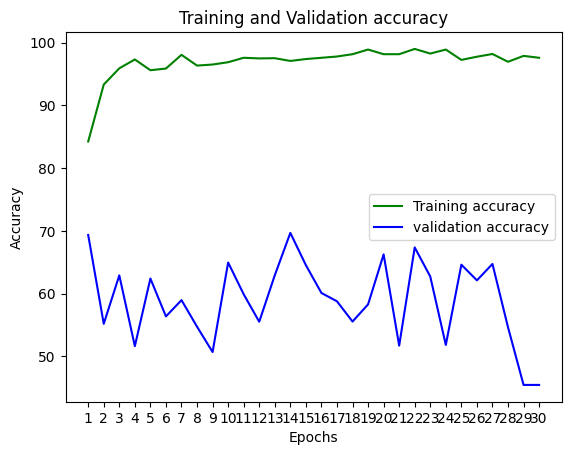

In [7]:
acc_train = []
acc_val = []
epochs = []


for k,v in result_dic.items():
    epochs.append(k)
    # print(v['loss'])
    acc_train.append(round(float(v['train_acc']), 4))
    acc_val.append(round(float(v['val_acc']), 4))


plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
# plt.savefig('train_valid_acc.png', bbox_inches='tight', dpi=300)

In [8]:
import torch
import torch.nn as nn
from resmasknet_test import *
import random
from tqdm import tqdm
def resmasking_dropout1(in_channels=3, num_classes=7, weight_path=""):
    model = ResMasking(weight_path)
    model.fc = nn.Sequential(
        nn.Dropout(0.4),
        nn.Linear(512, 1)
        # nn.Linear(512, num_classes)
    )
    def get_resource_path():
        return ''

    # use_gpu = torch.cuda.is_available()
    # if use_gpu:
    #     model.load_state_dict(
    #         torch.load(
    #             os.path.join(
    #                 get_resource_path(), "ResMaskNet_Z_resmasking_dropout1_rot30.pth"
    #                 )
    #             )['net']
    #         )
    #     model.cuda()

    # else:
    # model.load_state_dict(
    #     torch.load(
    #         os.path.join(
    #             'check_points', "model_20230303_162733_epoch24_best.pt"
    #         ),
    #     map_location={"cuda:0": "cpu"},
    #     )
    # )
    # model.fc = nn.Sequential(
    #     nn.Dropout(0.4),
    #     nn.Linear(512, 1)
    #     # nn.Linear(512, num_classes)
    # )
    return model


/opt/conda/envs/pybert/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:

model = resmasking_dropout1()



## Happy_Rank1_50_v1

[0.7056, 0.7007, 0.6875, 0.6762, 0.6622, 0.6461, 0.6203, 0.579, 0.5349, 0.4779, 0.3949, 0.3324, 0.2569, 0.1952, 0.1469]


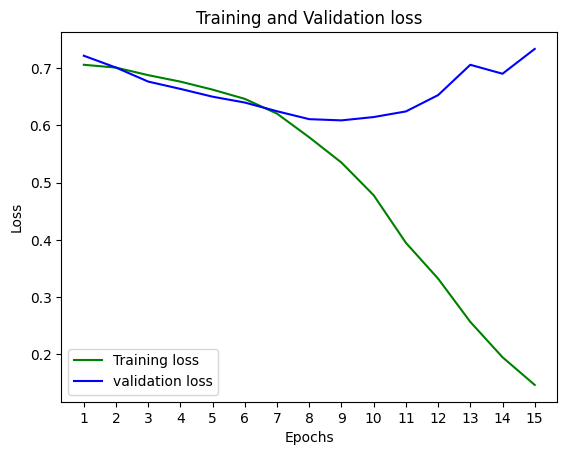

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import json
result_dic = []
result_dic = json.load(open('check_points/Happy_Rank1_50_v1/20230809_170453/20230809_170453log.json'))
# result_dic = json.load(open('20230413_063159log.json'))
# print(result_dic)

# draw fig
loss_train = []
loss_val = []
epochs = []
for k,v in result_dic.items():
    if int(k) > 15:
        break
    epochs.append(k)
    # print(v)
    loss_train.append(round(float(v['train_loss']), 4))
    loss_val.append(round(float(v['val_loss']), 4))
    # loss_train.append(round(float(v['loss']['train']), 4))
    # loss_val.append(round(float(v['loss']['valid']), 4))

print(loss_train)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
# plt.xlim([0,31])
plt.legend()
# plt.savefig('train_valid_loss.png', bbox_inches='tight', dpi=300)

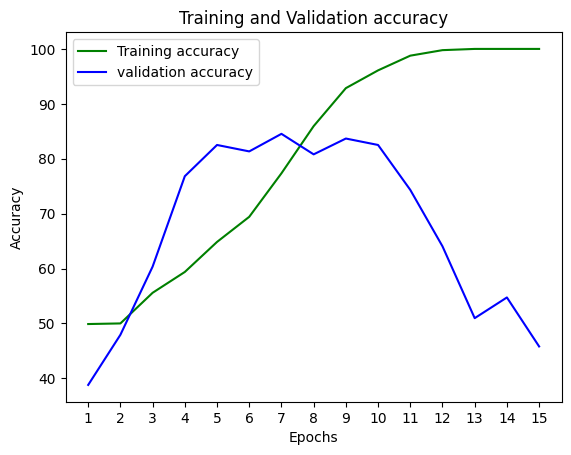

In [34]:
acc_train = []
acc_val = []
epochs = []


for k,v in result_dic.items():
    if int(k) > 15:
        break
    epochs.append(k)
    # print(v['loss'])
    acc_train.append(round(float(v['train_acc']), 4))
    acc_val.append(round(float(v['val_acc']), 4))


plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
# plt.savefig('train_valid_acc.png', bbox_inches='tight', dpi=300)

## Happy_Rank1_50_include_neg

[0.6677, 0.554, 0.3676, 0.1928, 0.0876, 0.0416, 0.0238, 0.0148, 0.0102, 0.0076, 0.0056, 0.0044, 0.0035, 0.003, 0.0025, 0.002, 0.0017, 0.0015, 0.0013, 0.0011, 0.0011, 0.0009, 0.0008, 0.0007, 0.0007]


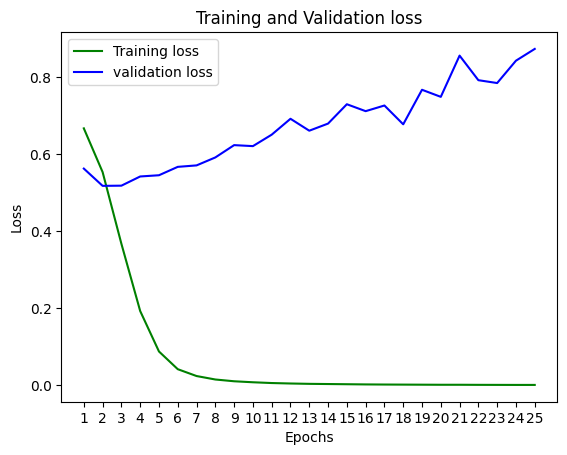

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import json
result_dic = []
result_dic = json.load(open('check_points/Happy_Rank1_50_include_neg/20230809_175648/20230809_175648log.json'))
# result_dic = json.load(open('20230413_063159log.json'))
# print(result_dic)

# draw fig
loss_train = []
loss_val = []
epochs = []
for k,v in result_dic.items():
    # if int(k) > 15:
    #     break
    epochs.append(k)
    # print(v)
    loss_train.append(round(float(v['train_loss']), 4))
    loss_val.append(round(float(v['val_loss']), 4))
    # loss_train.append(round(float(v['loss']['train']), 4))
    # loss_val.append(round(float(v['loss']['valid']), 4))

print(loss_train)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
# plt.xlim([0,31])
plt.legend()
# plt.savefig('train_valid_loss.png', bbox_inches='tight', dpi=300)

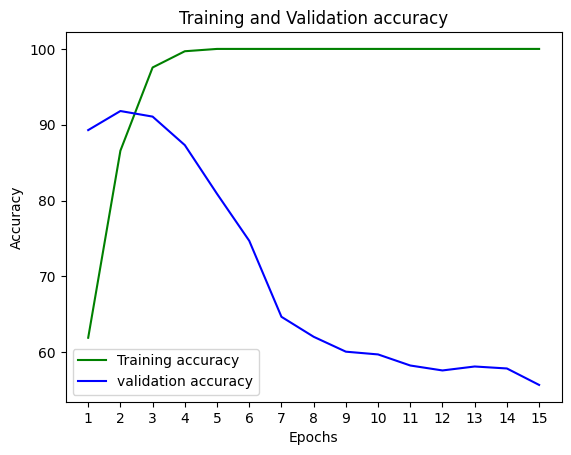

In [13]:
acc_train = []
acc_val = []
epochs = []


for k,v in result_dic.items():
    if int(k) > 15:
        break
    epochs.append(k)
    # print(v['loss'])
    acc_train.append(round(float(v['train_acc']), 4))
    acc_val.append(round(float(v['val_acc']), 4))


plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
# plt.savefig('train_valid_acc.png', bbox_inches='tight', dpi=300)

## Happy_Rank1_50_include_neg_v2

[0.6818, 0.6175, 0.5185, 0.3924, 0.2623, 0.1603, 0.0968, 0.0593, 0.0384, 0.0274, 0.0198, 0.0149, 0.0117, 0.0096, 0.0078, 0.0065, 0.0055, 0.0049, 0.0041, 0.0035, 0.0033, 0.0027, 0.0025, 0.0021, 0.002]


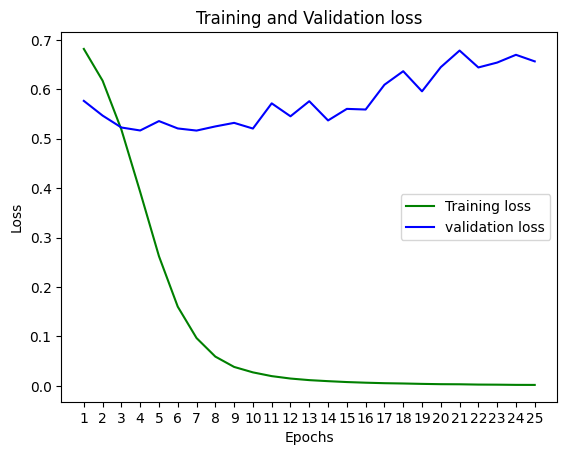

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import json
result_dic = []
result_dic = json.load(open('check_points/Happy_Rank1_50_include_neg_v2/20230823_033949/20230823_033949log.json'))
# result_dic = json.load(open('20230413_063159log.json'))
# print(result_dic)

# draw fig
loss_train = []
loss_val = []
epochs = []
for k,v in result_dic.items():
    # if int(k) > 15:
    #     break
    epochs.append(k)
    # print(v)
    loss_train.append(round(float(v['train_loss']), 4))
    loss_val.append(round(float(v['val_loss']), 4))
    # loss_train.append(round(float(v['loss']['train']), 4))
    # loss_val.append(round(float(v['loss']['valid']), 4))

print(loss_train)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
# plt.xlim([0,31])
plt.legend()
# plt.savefig('train_valid_loss.png', bbox_inches='tight', dpi=300)

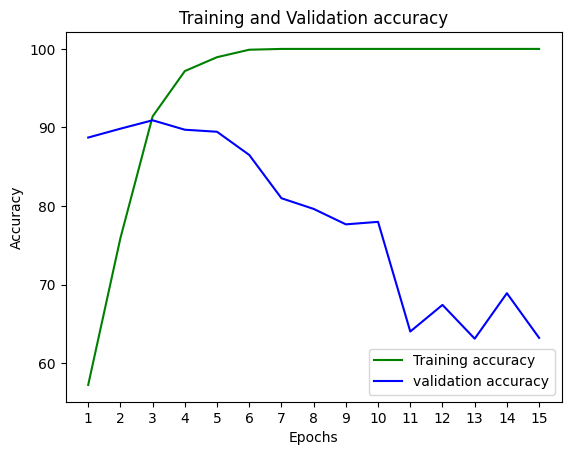

In [15]:
acc_train = []
acc_val = []
epochs = []


for k,v in result_dic.items():
    if int(k) > 15:
        break
    epochs.append(k)
    # print(v['loss'])
    acc_train.append(round(float(v['train_acc']), 4))
    acc_val.append(round(float(v['val_acc']), 4))


plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
# plt.savefig('train_valid_acc.png', bbox_inches='tight', dpi=300)